In [2]:
!git clone https://github.com/dvida/cyoptics-clustering.git

Cloning into 'cyoptics-clustering'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 58 (delta 0), reused 1 (delta 0), pack-reused 55
Receiving objects: 100% (58/58), 33.32 KiB | 11.11 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
%cd cyoptics-clustering/

/content/cyoptics-clustering


In [4]:
from __future__ import print_function, division, absolute_import

import numpy as np

# Cython init
import pyximport
pyximport.install(setup_args={'include_dirs':[np.get_include()]})
from cyOPTICS import runCyOPTICS

In [5]:
def runOPTICS(input_list, eps, min_pts):
    """ A wrapper funtion for the OPTICS clustering Cython implementation.
    Arguments:
        input_list: [ndarray] 2D numpy array containing the input data (1 datum per row)
        eps: [float] epsilon parameter - maximum distance between points
        min_pts: [int] minimum points in the cluster

    Return:
        point_list: [ndarray] 2D numpy array containing information about every processed point, the columns
            of the array are:
            - processed: 0 for not processed, 1 for processed - upon returning, processed values of all
                entries should be 1
            - reachability distance: -1 for first points in the cluster, positive for all others
            - core distance: -1 for noise, positive otherwise (the notion of noise can change with regard to
                the different input values eps and min_pts)
            - input data points (the input data colums are appended to the right)
    """

    return runCyOPTICS(input_list, eps, min_pts)


In [6]:
def sampleGaussian(x, y, std_x, std_y, n_samples):
    """ Draw samples from a 2D Gaussian distribution with the given input parameters. """

    mean = [x, y]
    cov = [[std_x, 0], [0, std_y]]  # diagonal covariance
    return np.random.multivariate_normal(mean, cov, n_samples)

In [7]:
def plotPoints(points, clusters=[], title=''):

    # Plot all points
    plt.scatter(points[:,0], points[:,1], c='k', linewidth=0.2, edgecolor='w', facecolor=None)

    # Plot clusters, if any
    if clusters:

        # Generate a list of colors for each cluster and randomize their order (so close clusters would have
        # significcantly different color)
        colors = cm.inferno(np.linspace(0.3, 1, len(clusters)))
        color_order = random.sample(range(len(colors)), len(colors))

        # Plot the clusters in 2D
        for color, cluster in zip(colors[color_order], clusters):
            plt.scatter(ordered_list[cluster][:,3], ordered_list[cluster][:,4], c=color, linewidth=0.2,
                edgecolor='w')

    # Set the title
    plt.title(title)

    # Turn on the grid, set color to grey
    plt.gca().grid(color='0.5')

    # Set background color to black
    plt.gca().set_facecolor('black')

    # Set the ratio to the window size 1:1
    plt.gca().set_aspect('equal')
    plt.tight_layout()

    plt.show()

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import random

from GradientClustering import gradientClustering, plotClusteringReachability, filterLargeClusters, \
    mergeSimilarClusters

In [9]:
import matplotlib
print(matplotlib.__version__)

3.7.1


Input data size 512


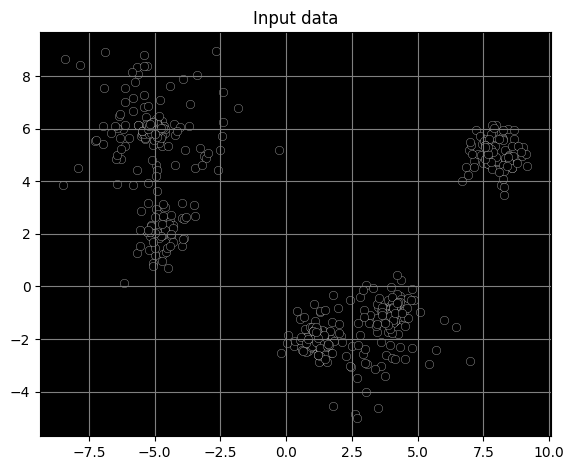

Total time for processing 0.04587472000000048 s
Ordered list
Point index [Processed, reachability dist, code dist, input data ... ]
0 [ 1.         -1.          1.91459811 -5.83373136  3.87243819]
1 [ 1.          1.91459811  1.28697979 -4.95621513  2.96452895]
2 [ 1.          1.28697979  0.94288933 -4.73149924  2.04880908]
3 [ 1.          0.94288933  1.11701858 -5.07820545  1.68334391]
4 [ 1.          0.94288933  1.14390886 -4.67208563  2.66660429]
5 [ 1.          0.94288933  1.05100858 -4.46724739  2.39469757]
6 [ 1.          0.94288933  1.11791205 -5.31156823  2.07904429]
7 [ 1.          0.94288933  1.31256175 -5.54797633  2.15141875]
8 [ 1.          0.94288933  1.02146339 -4.36812478  1.98328457]
9 [ 1.          0.94288933  1.23266649 -4.98290532  2.62926436]
10 [ 1.          0.94288933  1.35278869 -3.8904725   1.83137489]
11 [ 1.          0.94288933  0.98919052 -4.30502551  2.23721901]
12 [ 1.          0.94288933  1.16751945 -4.99261183  1.46178519]
13 [ 1.          0.94288933  0.98

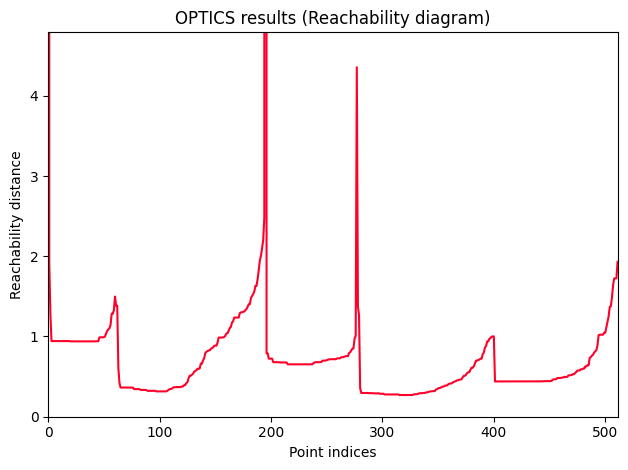

TOTAL BEFORE MERGING 59


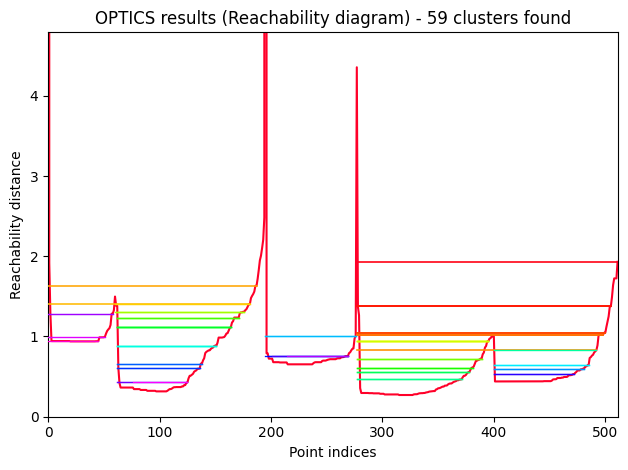

TOTAL POINTS 512
CLUSTERS
------------------------------------------
Size, X mean +/- stddev, Y mean +/- stddev
235 2.797771441210577 1.4791531150978856 -1.608059100821375 0.875418798182099
Members:
[[ 4.23141857  0.42268349]
 [ 4.38435864  0.25469777]
 [ 4.07035672 -0.80319307]
 [ 3.92492435 -1.12846164]
 [ 3.95557602 -1.25864611]
 [ 3.94600947 -1.20564346]
 [ 4.06613884 -1.38840164]
 [ 3.64877135 -1.10074039]
 [ 3.94706569 -0.85428931]
 [ 4.12634075 -1.29593597]
 [ 4.15220594 -0.99643595]
 [ 4.19270454 -1.1576479 ]
 [ 3.96930841 -1.22055144]
 [ 3.95039875 -1.10429555]
 [ 4.10751553 -1.09214231]
 [ 4.17474172 -1.28046239]
 [ 4.13514822 -1.32967755]
 [ 4.30644281 -0.97162222]
 [ 4.22388462 -1.07838796]
 [ 3.94532266 -1.12239947]
 [ 3.99904271 -1.01646855]
 [ 4.12124788 -1.19129042]
 [ 3.80959488 -1.1463592 ]
 [ 4.15561606 -0.9551534 ]
 [ 3.91979985 -1.00023103]
 [ 3.98608022 -1.17898552]
 [ 3.659396   -0.94243434]
 [ 4.014161   -0.93687658]
 [ 3.71928219 -0.82141663]
 [ 3.74564851 -0.9

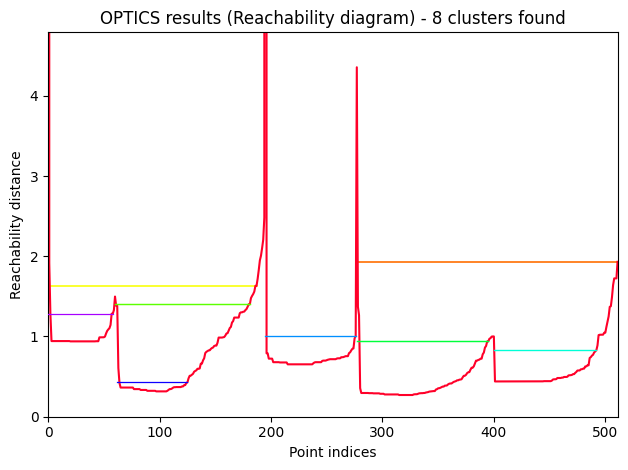

<ipython-input-7-16b737ffee41>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(ordered_list[cluster][:,3], ordered_list[cluster][:,4], c=color, linewidth=0.2,


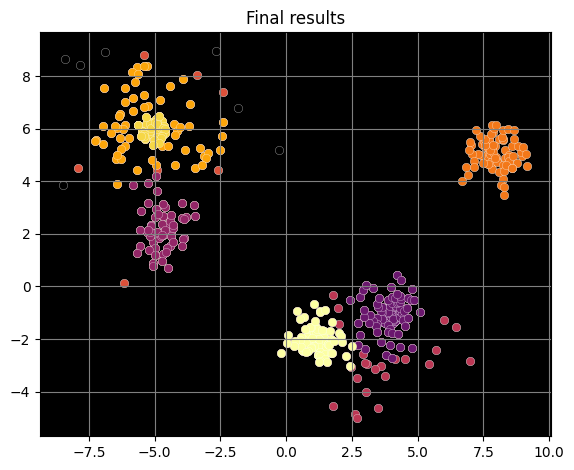

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import random

from GradientClustering import gradientClustering, plotClusteringReachability, filterLargeClusters, \
    mergeSimilarClusters


    ### Set OPTICS parameters
    # See this paper for more information:
    # http://fogo.dbs.ifi.lmu.de/Publikationen/Papers/OPTICS.pdf

min_points = 40
epsilon = 5.0

    ###

    ### Gradient clustering parameters
    # See this paper for more details about there parameters (section 3.2)
    # http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.215.3924&rep=rep1&type=pdf

t = 150 # deg

    # Width between the data in the reachability diagram
w = 0.025

    ###

    ### Cluster postprocessing parameters

    # Value which determines the size of the largest cluster, i.e. if the value is 0.5, all clusters larger
    # than 50% of the number of the total input points will be rejected (max. value of 1.0)
max_points_ratio = 0.5

    # Value which determines how similar clusters are to be merged, i.e. if 0.7 then 2 clusters must share at
    # least 70% common points to be merged (max. value of 1.0)
cluster_similarity_threshold = 0.7

    ###


    ### Generate input data as Gaussian point sources

np.random.seed(1)

    # Range of points per cluster
points_per_cluster_range = [50, 100]

input_data = np.empty((0, 2))

input_data = np.r_[input_data, sampleGaussian(-5, 6, 2.3, 2.3,
    np.random.randint(*points_per_cluster_range))]

input_data = np.r_[input_data, sampleGaussian(-5, 6, 0.05, 0.05,
    np.random.randint(*points_per_cluster_range))]

input_data = np.r_[input_data, sampleGaussian(-5, 2, 0.4, 0.4,
    np.random.randint(*points_per_cluster_range))]

input_data = np.r_[input_data, sampleGaussian(8, 5, 0.3, 0.3,
    np.random.randint(*points_per_cluster_range))]

input_data = np.r_[input_data, sampleGaussian(4, -1, 0.1, 0.1,
    np.random.randint(*points_per_cluster_range))]

input_data = np.r_[input_data, sampleGaussian(1, -2, 0.2, 0.2,
    np.random.randint(*points_per_cluster_range))]

input_data = np.r_[input_data, sampleGaussian(3, -2, 2.0, 2.0,
    np.random.randint(*points_per_cluster_range))]

    ###

print('Input data size', len(input_data))

    # Plot input data
plotPoints(input_data, title='Input data')


t1 = time.process_time()

    # Run OPTICS ordering
ordered_list = runOPTICS(input_data, epsilon, min_points)

print('Total time for processing', time.process_time() - t1, 's')

print('Ordered list')
print('Point index [Processed, reachability dist, code dist, input data ... ]')
for j, entry in enumerate(ordered_list):
    print(j, entry)

print(ordered_list[:,1])

    # Plot the reachability diagram
plotClusteringReachability(ordered_list[:,1])


    # Do the gradient clustering
clusters = gradientClustering(ordered_list[:,1], min_points, t, w)


    # Remove very large clusters
filtered_clusters = filterLargeClusters(clusters, len(ordered_list), max_points_ratio)


print('TOTAL BEFORE MERGING', len(filtered_clusters))

    # Plot the results, reachability diagram
plotClusteringReachability(ordered_list[:,1], filtered_clusters)


    # Merge similar clusters by looking at the ratio of their intersection and their total number
filtered_clusters = mergeSimilarClusters(filtered_clusters, cluster_similarity_threshold)

print('TOTAL POINTS', len(ordered_list[:,1]))
print('CLUSTERS')
for cluster in filtered_clusters:

    members = ordered_list[cluster][:,3:]

    x_mean = np.mean(members[:,0])
    x_std = np.std(members[:,0])

    y_mean = np.mean(members[:,1])
    y_std = np.std(members[:,1])


    print('------------------------------------------')

    print('Size, X mean +/- stddev, Y mean +/- stddev')
    print(len(cluster), x_mean, x_std, y_mean, y_std)
    print('Members:')
    print(members)

    # Plot the results, reachability diagram
plotClusteringReachability(ordered_list[:,1], filtered_clusters)

    # Plot the final results
plotPoints(input_data, filtered_clusters, title='Final results')